In [2]:
import csv
import os
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt

# Iteration 1

**23 et 24 avril 2025**

In [3]:
cwd = os.getcwd()
files = os.listdir(cwd)
print("Files in %r: %s" % (cwd, files))


Files in '/home/marie.edet@Digital-Grenoble.local/Documents/mod1-python/projet_arbre/notebooks': ['.ipynb_checkpoints', 'trees.ipynb', 'trees_pandas.ipynb']


Extraction de l'ensemble des lignes du fichier csv. Stockage dans l'objet *data*.

In [4]:
with open('/home/marie.edet@Digital-Grenoble.local/Documents/mod1-python/projet_arbre/data/trees.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

Extraction des deux premières lignes du csv. La première est l'ensemble des variables. La seconde contient les informations pour un arbre.

In [5]:
data[:2]

[['\ufeffELEM_POINT_ID',
  'CODE',
  'NOM',
  'GENRE',
  'GENRE_DESC',
  'CATEGORIE',
  'CATEGORIE_DESC',
  'SOUS_CATEGORIE',
  'SOUS_CATEGORIE_DESC',
  'CODE_PARENT',
  'CODE_PARENT_DESC',
  'ADR_SECTEUR',
  'BIEN_REFERENCE',
  'GENRE_BOTA',
  'ESPECE',
  'VARIETE',
  'STADEDEDEVELOPPEMENT',
  'EQUIPE',
  'REMARQUES',
  'ANNEEDEPLANTATION',
  'RAISONDEPLANTATION',
  'TRAITEMENTCHENILLES',
  'COURRIER',
  'IDENTIFIANTPLU',
  'TYPEIMPLANTATIONPLU',
  'INTITULEPROTECTIONPLU',
  'ANNEEABATTAGE',
  'ESSOUCHEMENT',
  'DIAMETREARBRE',
  'CAUSEABATTAGE',
  'COLLECTIVITE',
  'GeoJSON'],
 ['37993',
  'ESP37969',
  'ESP37969',
  'VEG',
  'VEGETATION',
  'ESP01',
  'Arbre',
  'ESP065',
  "Arbre d'enceintes fermées",
  'ESP37898',
  'Maison des Collines Jard Poisat',
  '6',
  'AR37969',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '{"type":"Point","coordinates":[5.76034690089422,45.1543159441061]}']]

In [6]:
data[15000]

['3995',
 'ESP16139',
 'ESP16139',
 'VEG',
 'VEGETATION',
 'ESP01',
 'Arbre',
 'ESP174',
 "Arbre d'espaces ouverts",
 'ESP137',
 'Sq Waldeck Rousseau',
 '1',
 'AR16139',
 'Pinus',
 'sylvestris',
 '',
 'Arbre adulte',
 '',
 '',
 '1986',
 '',
 'Haute',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Ville de Grenoble',
 '{"type":"Point","coordinates":[5.70917290082413,45.1835028522018]}']

Affichage de la 2e colonne des 2eres lignes: le code du premier arbre.

In [7]:
data[0][1], data[1][1]

('CODE', 'ESP37969')

Nombre d'arbres

In [8]:
len(data)

31244

## Année de plantation

L'année de plantation est la colonne à l'indice 19.

In [9]:
data[0].index("ANNEEDEPLANTATION")

19

Création de l'objet contenant l'ensemble des années.

In [10]:
l_annees = list()
for i in range(len(data)):
    l_annees.append(data[:][i][19])
l_annees[:25]

['ANNEEDEPLANTATION',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017']

In [11]:
len(l_annees)

31244

Nombre d'arbre pour lesquels l'information concernant l'année de plantation est manquante.

In [12]:
l_annees.count('')

442

On retire le nom de la variable et les années de plantation manquantes.

In [13]:
l_annees.remove('ANNEEDEPLANTATION')
while '' in l_annees:
    l_annees.remove('')
len(l_annees)

30801

In [14]:
l_annees[:25]

['2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017']

Nombre d'arbre plantés en 2001.

In [15]:
l_annees.count('2001')

1626

Création d'un set contenant les différentes années de plantation. Première et dernière années pour lesquelles un arbre a été planté et réferencé.

In [16]:
unique_annees = set(l_annees)
min(unique_annees), max(unique_annees)

('1950', '2017')

Nombre d'arbres plantés par année.

In [17]:
count_annees = list()
for i in range(1950, 2018):
    count_annees.append((str(i), l_annees.count(str(i))))
count_annees

[('1950', 422),
 ('1951', 0),
 ('1952', 0),
 ('1953', 0),
 ('1954', 0),
 ('1955', 66),
 ('1956', 0),
 ('1957', 0),
 ('1958', 0),
 ('1959', 0),
 ('1960', 745),
 ('1961', 27),
 ('1962', 0),
 ('1963', 0),
 ('1964', 7),
 ('1965', 760),
 ('1966', 95),
 ('1967', 57),
 ('1968', 116),
 ('1969', 350),
 ('1970', 1444),
 ('1971', 75),
 ('1972', 364),
 ('1973', 34),
 ('1974', 350),
 ('1975', 3922),
 ('1976', 972),
 ('1977', 616),
 ('1978', 912),
 ('1979', 361),
 ('1980', 1528),
 ('1981', 644),
 ('1982', 448),
 ('1983', 333),
 ('1984', 666),
 ('1985', 990),
 ('1986', 238),
 ('1987', 771),
 ('1988', 266),
 ('1989', 307),
 ('1990', 433),
 ('1991', 146),
 ('1992', 226),
 ('1993', 161),
 ('1994', 288),
 ('1995', 781),
 ('1996', 385),
 ('1997', 238),
 ('1998', 220),
 ('1999', 603),
 ('2000', 461),
 ('2001', 1626),
 ('2002', 341),
 ('2003', 352),
 ('2004', 352),
 ('2005', 450),
 ('2006', 616),
 ('2007', 155),
 ('2008', 219),
 ('2009', 696),
 ('2010', 467),
 ('2011', 530),
 ('2012', 338),
 ('2013', 335),


Nombre d'arbre moyen plantés par année

In [18]:
nb_total = 0
for i in range(len(count_annees)):
    nb_total += count_annees[i][1]
round(nb_total/len(count_annees),2)

452.96

Maire ayant planté le plus d'arbres.

In [19]:
maires = [("Leon Martin", 1949), ("Albert Michallon", 1959), ("Hubert Dubedout", 1965), ("Alain Carignon", 1983), ("Michel Destot", 1995), ("Eric Piolle", 2014), ("Inconnu", 2026)]

In [20]:
maires[0], maires[0][1]

(('Leon Martin', 1949), 1949)

In [21]:
liste_maires = list()
for n in range(len(maires)):
    liste_maires.append(maires[n][0])
liste_maires

['Leon Martin',
 'Albert Michallon',
 'Hubert Dubedout',
 'Alain Carignon',
 'Michel Destot',
 'Eric Piolle',
 'Inconnu']

In [22]:
count_maires_d = {maire : 0 for maire in liste_maires}
n = 0
maire_en_cours = ''
for i in range(len(count_annees)):
    if int(count_annees[i][0]) >= maires[n][1] and int(count_annees[i][0]) < maires[n+1][1]:
        count_maires_d[maires[n][0]] += count_annees[i][1]
    else:
        n += 1

In [23]:
count_maires_d.pop('Inconnu')
count_maires_d

{'Leon Martin': 488,
 'Albert Michallon': 779,
 'Hubert Dubedout': 12288,
 'Alain Carignon': 4492,
 'Michel Destot': 8384,
 'Eric Piolle': 1615}

## Genre botanique

Le genre botanique est la colonne à l'indice 13.

In [24]:
data[0].index("GENRE_BOTA")

13

Liste des arbres avec leur année de plantation et leur genre (si on a l'information pour les deux).

In [25]:
l_bota = list()
for i in range(len(data)):
    if data[:][i][19] != '' and data[:][i][13] != '':
        l_bota.append((data[:][i][19], data[:][i][13]))
l_bota.pop(0)
l_bota[:25]

[('2017', 'Platanus'),
 ('2017', 'Platanus'),
 ('2017', 'Platanus'),
 ('2017', 'Platanus'),
 ('2017', 'Platanus'),
 ('2017', 'Platanus'),
 ('2017', 'Platanus'),
 ('2017', 'Platanus'),
 ('2017', 'Platanus'),
 ('2017', 'Platanus'),
 ('2017', 'Platanus'),
 ('2017', 'Platanus'),
 ('2017', 'Platanus'),
 ('2017', 'Platanus'),
 ('2017', 'Platanus'),
 ('2017', 'Platanus'),
 ('2017', 'Platanus'),
 ('2017', 'Platanus'),
 ('2017', 'Platanus'),
 ('2017', 'Platanus'),
 ('2017', 'Platanus'),
 ('2017', 'Platanus'),
 ('2017', 'Platanus'),
 ('2017', 'Platanus'),
 ('2017', 'Platanus')]

Nombre d'arbres dans cette liste

In [26]:
len(l_bota)

30723

## Un zistogramme

In [27]:
indices = np.arange(len(count_annees))
print("indices", indices)

nb = list()
year = list()
for i in range(len(indices)):
    year.append(count_annees[i][0])
    nb.append(count_annees[i][1])

print("year", year)
print("nb", nb)

indices [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67]
year ['1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
nb [422, 0, 0, 0, 0, 66, 0, 0, 0, 0, 745, 27, 0, 0, 7, 760, 95, 57, 116, 350, 1444, 75, 364, 34, 350, 3922, 972, 616, 912, 361, 1528, 644, 448, 333, 666, 990, 238, 771, 266, 307, 433, 146, 226, 161, 288, 781, 385, 238, 220, 603, 461, 

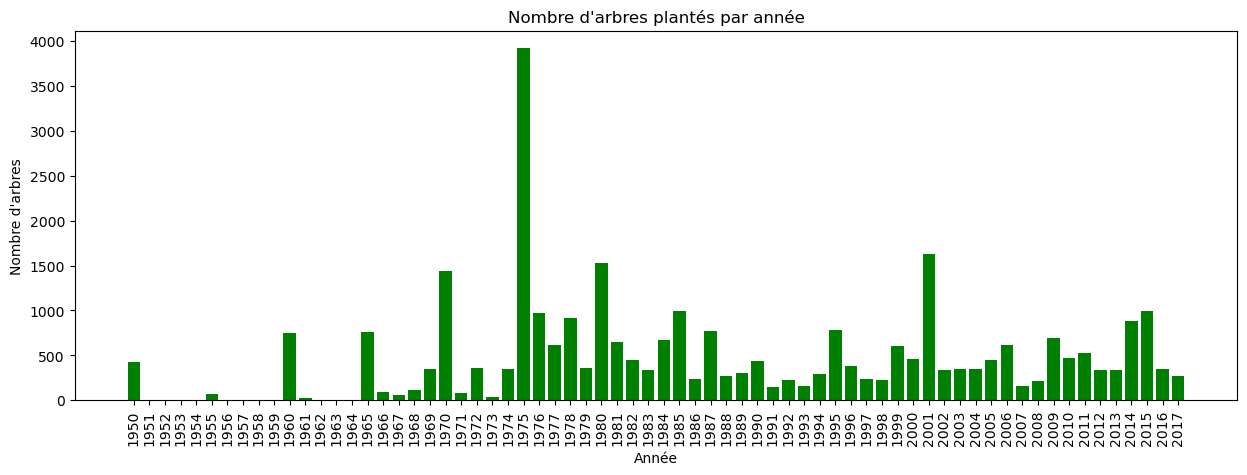

In [28]:
plt.figure().set_figwidth(15)
plt.bar(indices, nb, color='g')
plt.xticks(indices, year, rotation='vertical')
plt.title("Nombre d'arbres plantés par année")
plt.xlabel("Année")
plt.ylabel("Nombre d'arbres")
plt.show()

## Tri des arbres et leur années de plantation par ordre chronologique

In [29]:
l_bota = l_bota[1:]
for i in l_bota:
    if i[0] == '' or i[1] == '':
        l_bota.remove(i)
l_bota.sort(key=lambda a: a[0])
l_bota[:25]

[('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus')]

# Iteration 2

Liste des différents genres botaniques. Il y a 112 différents genres botaniques.

In [30]:
l_genre = list()
for n in range(len(l_bota)):
    l_genre.append(l_bota[n][1])
l_genre[:25]

['Platanus',
 'Platanus',
 'Platanus',
 'Platanus',
 'Platanus',
 'Platanus',
 'Platanus',
 'Platanus',
 'Platanus',
 'Platanus',
 'Platanus',
 'Platanus',
 'Platanus',
 'Platanus',
 'Platanus',
 'Platanus',
 'Platanus',
 'Platanus',
 'Platanus',
 'Platanus',
 'Platanus',
 'Platanus',
 'Platanus',
 'Platanus',
 'Platanus']

In [31]:
unique_genre = set(l_genre)
unique_genre

{'Abies',
 'Acer',
 'Aesculus',
 'Ailanthus',
 'Albizia',
 'Alnus',
 'Amélanchier',
 'Araucaria',
 'Betula',
 'Broussonetia',
 'Buxus',
 'Calocedrus',
 'Carpinus',
 'Castanea',
 'Catalpa',
 'Cedrela',
 'Cedrus',
 'Celtis',
 'Cephalotaxus',
 'Cercidiphyllum',
 'Cercis',
 'Chamaecyparis',
 'Chimonanthus',
 'Chionanthus',
 'Chitalpa',
 'Cladastris',
 'Clerodendron',
 'Cornus',
 'Corylus',
 'Cotinus',
 'Crataegus',
 'Cryptomeria',
 'Cupressocyparis',
 'Cupressus',
 'Cydonia',
 'Davidia',
 'Diospyros',
 'Eleagnus',
 'Eriobotrya ',
 'Eucalyptus',
 'Fagus',
 'Ficus',
 'Fontanesia',
 'Fraxinus',
 'Ginkgo',
 'Gleditsia',
 'Gymnocladus',
 'Halesia',
 'Hovenia',
 'Ilex',
 'Juglans',
 'Juniperus',
 'Koelreuteria',
 'Laburnum',
 'Lagerstroemia',
 'Larix',
 'Libocedrus',
 'Ligustrum',
 'Liquidambar',
 'Liriodendron',
 'Lonicera',
 'Maclura',
 'Magnolia',
 'Malus',
 'Mespilus',
 'Metasequoia',
 'Morus',
 'Nyssa',
 'Olea',
 'Ostrya',
 'Parrotia',
 'Paulownia',
 'Phellodendron',
 'Phillyrea',
 'Photini

In [32]:
len(unique_genre)

112

Nombre d'arbres par genre

In [33]:
count_genre = list()
for genre in unique_genre:
    count_genre.append((genre, l_genre.count(genre)))
count_genre

[('Cryptomeria', 2),
 ('Syringa', 41),
 ('Cercis', 351),
 ('Ptelea', 3),
 ('Cupressocyparis', 100),
 ('Maclura', 5),
 ('Sequoia', 1),
 ('Platanus', 4661),
 ('Ailanthus', 80),
 ('Poncinos', 1),
 ('Sequoiadendron', 14),
 ('Morus', 100),
 ('Pterostyrax', 6),
 ('Staphylea', 1),
 ('Pinus', 2118),
 ('Albizia', 67),
 ('Cladastris', 45),
 ('Calocedrus', 4),
 ('Quercus', 677),
 ('Celtis', 193),
 ('Libocedrus', 47),
 ('Juglans', 66),
 ('Trachycarpus', 22),
 ('Cephalotaxus', 3),
 ('Chionanthus', 33),
 ('Liquidambar', 809),
 ('Cornus', 23),
 ('Catalpa', 89),
 ('Amélanchier', 96),
 ('Liriodendron', 507),
 ('Pterocarya', 52),
 ('Zelkova', 233),
 ('Metasequoia', 81),
 ('Taxodium', 9),
 ('Halesia', 9),
 ('Abies', 28),
 ('Corylus', 174),
 ('Nyssa', 1),
 ('Koelreuteria', 271),
 ('Fagus', 267),
 ('Pistacia', 7),
 ('Punica', 3),
 ('Ulmus', 210),
 ('Pyrus', 501),
 ('Populus', 966),
 ('Diospyros', 17),
 ('Salix', 143),
 ('Sciadopitys', 1),
 ('Hovenia', 2),
 ('Cedrus', 407),
 ('Fontanesia', 4),
 ('Olea', 5),

Tri par ordre décroissant. Le genre d'arbre le plus planté est *Acer*. Visualisation.

In [34]:
count_genre.sort(key=lambda a: a[1], reverse=True)
count_genre

[('Acer', 5276),
 ('Platanus', 4661),
 ('Pinus', 2118),
 ('Tilia', 1770),
 ('Fraxinus', 1502),
 ('Carpinus', 1296),
 ('Betula', 1247),
 ('Prunus', 996),
 ('Populus', 966),
 ('Alnus', 826),
 ('Liquidambar', 809),
 ('Quercus', 677),
 ('Liriodendron', 507),
 ('Pyrus', 501),
 ('Aesculus', 459),
 ('Sophora', 426),
 ('Magnolia', 409),
 ('Cedrus', 407),
 ('Chamaecyparis', 373),
 ('Gleditsia', 352),
 ('Cercis', 351),
 ('Robinia', 287),
 ('Koelreuteria', 271),
 ('Fagus', 267),
 ('Malus', 262),
 ('Picea', 252),
 ('Zelkova', 233),
 ('Ulmus', 210),
 ('Cupressus', 203),
 ('Taxus', 202),
 ('Celtis', 193),
 ('Corylus', 174),
 ('Salix', 143),
 ('Ginkgo', 111),
 ('Crataegus', 108),
 ('Paulownia', 101),
 ('Cupressocyparis', 100),
 ('Morus', 100),
 ('Amélanchier', 96),
 ('Catalpa', 89),
 ('Tetradium', 88),
 ('Sorbus', 88),
 ('Metasequoia', 81),
 ('Ailanthus', 80),
 ('Albizia', 67),
 ('Juglans', 66),
 ('Parrotia', 54),
 ('Pterocarya', 52),
 ('Lagerstroemia', 50),
 ('Thuja', 48),
 ('Libocedrus', 47),
 ('Ce

In [35]:
indices = np.arange(len(count_genre))
print("indices", indices)

nb = list()
genre = list()
for i in range(len(indices)):
    genre.append(count_genre[i][0])
    nb.append(count_genre[i][1])

indices [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111]


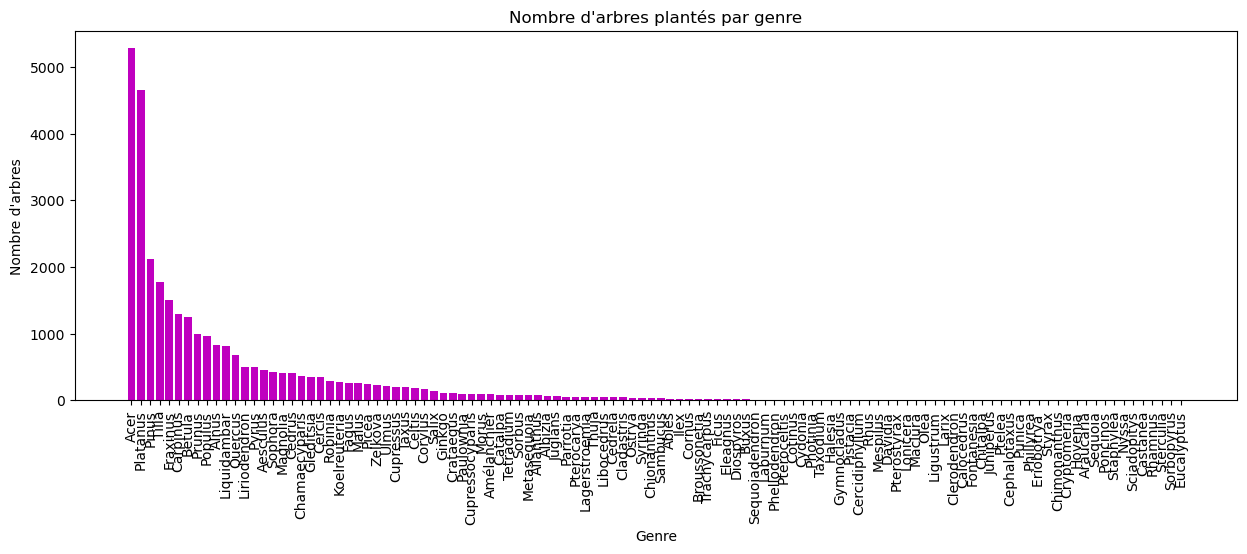

In [36]:
plt.figure().set_figwidth(15)
plt.bar(indices, nb, color='m')
plt.xticks(indices, genre, rotation='vertical')
plt.title("Nombre d'arbres plantés par genre")
plt.xlabel("Genre")
plt.ylabel("Nombre d'arbres")
plt.show()

In [37]:
proportion_genre = list()
for genre in count_genre:
    proportion_genre.append((genre[0], round(genre[1]/len(l_genre),3)))
proportion_genre.sort(key=lambda a: a[1], reverse=True)
proportion_genre

[('Acer', 0.172),
 ('Platanus', 0.152),
 ('Pinus', 0.069),
 ('Tilia', 0.058),
 ('Fraxinus', 0.049),
 ('Carpinus', 0.042),
 ('Betula', 0.041),
 ('Prunus', 0.032),
 ('Populus', 0.031),
 ('Alnus', 0.027),
 ('Liquidambar', 0.026),
 ('Quercus', 0.022),
 ('Liriodendron', 0.017),
 ('Pyrus', 0.016),
 ('Aesculus', 0.015),
 ('Sophora', 0.014),
 ('Magnolia', 0.013),
 ('Cedrus', 0.013),
 ('Chamaecyparis', 0.012),
 ('Gleditsia', 0.011),
 ('Cercis', 0.011),
 ('Robinia', 0.009),
 ('Koelreuteria', 0.009),
 ('Fagus', 0.009),
 ('Malus', 0.009),
 ('Picea', 0.008),
 ('Zelkova', 0.008),
 ('Ulmus', 0.007),
 ('Cupressus', 0.007),
 ('Taxus', 0.007),
 ('Celtis', 0.006),
 ('Corylus', 0.006),
 ('Salix', 0.005),
 ('Ginkgo', 0.004),
 ('Crataegus', 0.004),
 ('Paulownia', 0.003),
 ('Cupressocyparis', 0.003),
 ('Morus', 0.003),
 ('Amélanchier', 0.003),
 ('Catalpa', 0.003),
 ('Tetradium', 0.003),
 ('Sorbus', 0.003),
 ('Metasequoia', 0.003),
 ('Ailanthus', 0.003),
 ('Albizia', 0.002),
 ('Juglans', 0.002),
 ('Parrotia',

17.2% des arbres sont du genre Acer. La diversité est considérée comme bonne lorsqu'il n'y a pas plus de 20% d'un genre d'après le doc. L'objectif est respecté.

Liste des différentes espèces. Il y a 312 espèces différentes.

In [38]:
l_espece = list()
for i in range(len(data)):
    if data[:][i][13] != '' and data[:][i][14] != '':
        l_espece.append(data[:][i][13] + ' ' + data[:][i][14])
l_espece.pop(0)

'GENRE_BOTA ESPECE'

In [39]:
l_espece[:25]

['Ginkgo biloba',
 'Liriodendron tulipifera',
 'Liriodendron tulipifera',
 'Liriodendron tulipifera',
 'Catalpa bignonoides',
 'Platanus acerifolia',
 'Platanus acerifolia',
 'Platanus acerifolia',
 'Platanus acerifolia',
 'Platanus acerifolia',
 'Platanus acerifolia',
 'Platanus acerifolia',
 'Platanus acerifolia',
 'Platanus acerifolia',
 'Platanus acerifolia',
 'Platanus acerifolia',
 'Platanus acerifolia',
 'Platanus acerifolia',
 'Platanus acerifolia',
 'Robinia pseudoacacia',
 'Robinia pseudoacacia',
 'Acer grosseri',
 'Acer grosseri',
 'Acer grosseri',
 'Zelkova serrata']

In [40]:
len(l_espece)

29053

In [41]:
unique_espece = set(l_espece)
unique_espece

{'Abies concolor',
 'Abies koreana',
 'Abies nordmaniana',
 'Abies pinsapo',
 'Acer buergerianum',
 'Acer campestre',
 'Acer capillipes',
 'Acer cappadocicum',
 'Acer carpinifolia',
 'Acer davidii',
 'Acer freemanii',
 'Acer ginnala',
 'Acer griseum',
 'Acer grosseri',
 'Acer heldreichii',
 'Acer hippocastanum',
 'Acer japonicum',
 'Acer monspessulanum',
 'Acer negundo',
 'Acer nikoense',
 'Acer opalus',
 'Acer palmatum',
 'Acer platanoides',
 'Acer pseudoplatanus',
 'Acer rubrum',
 'Acer saccharinum',
 'Acer tartarica',
 'Acer triflorum',
 'Acer utilis',
 'Acer zoeschense',
 'Aesculus carnea',
 'Aesculus chandelle seche',
 'Aesculus hippocastanum',
 'Aesculus parviflora',
 'Aesculus pavia',
 'Ailanthus altissima',
 'Albizia jullibrissin',
 'Alnus cordata',
 'Alnus glutinosa',
 'Alnus incana',
 'Alnus spaethii',
 'Amélanchier alnifolia',
 'Amélanchier canadensis',
 'Amélanchier laevis',
 'Amélanchier lamarckii',
 'Amélanchier ovalis',
 'Araucaria exelsa',
 'Betula alba',
 'Betula nigra

In [42]:
len(unique_espece)

312

In [43]:
count_espece = list()
for espece in unique_espece:
    count_espece.append((espece, l_espece.count(espece)))
count_espece.sort(key=lambda a: a[1], reverse=True)
count_espece

[('Platanus acerifolia', 4422),
 ('Acer pseudoplatanus', 1347),
 ('Pinus nigra', 1304),
 ('Carpinus betulus', 1282),
 ('Acer platanoides', 1130),
 ('Tilia tomentosa', 1000),
 ('Acer campestre', 845),
 ('Liquidambar styraciflua', 806),
 ('Fraxinus excelsior', 776),
 ('Betula verrucosa', 712),
 ('Pinus sylvestris', 567),
 ('Alnus cordata', 550),
 ('Acer saccharinum', 507),
 ('Liriodendron tulipifera', 506),
 ('Populus nigra', 493),
 ('Aesculus hippocastanum', 432),
 ('Pyrus calleryana', 430),
 ('Prunus serrulata', 425),
 ('Sophora japonica', 422),
 ('Chamaecyparis lawsoniana', 370),
 ('Betula utilis', 361),
 ('Gleditsia triacanthos', 350),
 ('Cercis siliquastrum', 344),
 ('Magnolia grandiflora', 330),
 ('Cedrus atlantica', 316),
 ('Robinia pseudoacacia', 284),
 ('Koelreuteria paniculata', 271),
 ('Fagus sylvatica', 267),
 ('Tilia platyphyllos', 266),
 ('Tilia cordata', 257),
 ('Zelkova serrata', 231),
 ('Quercus cerris', 225),
 ('Populus robusta', 221),
 ('Picea abies', 206),
 ('Taxus ba

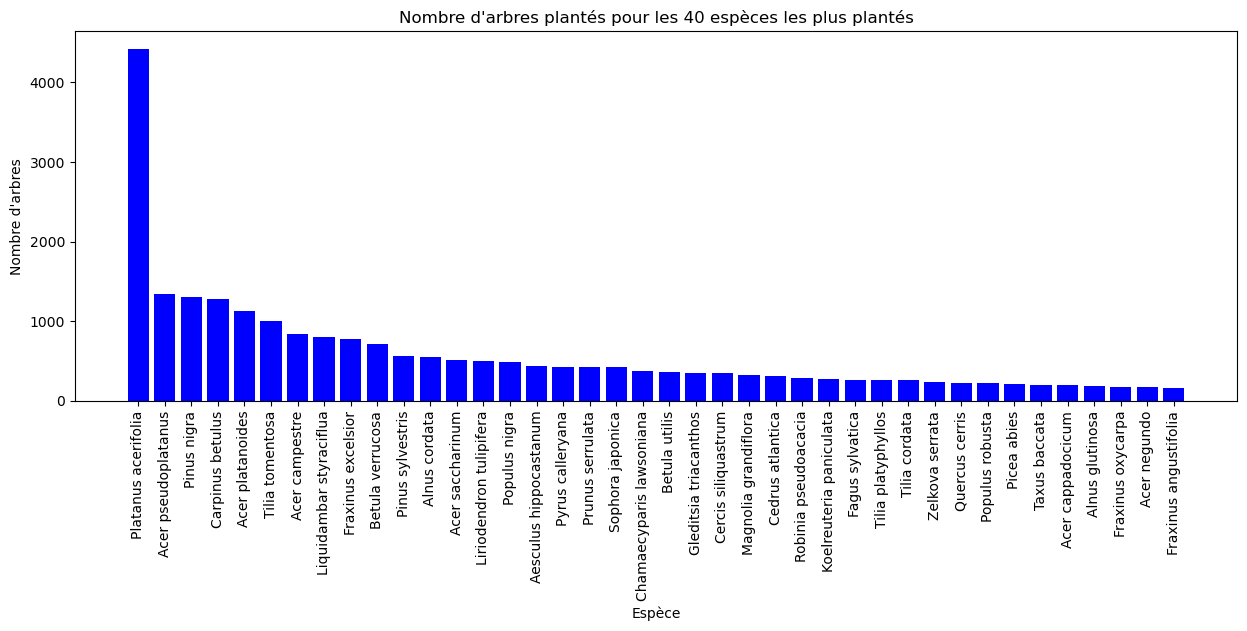

In [44]:
indices = np.arange(len(count_espece))

nb = list()
espece = list()
for i in range(40):
    espece.append(count_espece[i][0])
    nb.append(count_espece[i][1])

plt.figure().set_figwidth(15)
plt.bar(indices[:40], nb, color='b')
plt.xticks(indices[:40], espece, rotation='vertical')
plt.title("Nombre d'arbres plantés pour les 40 espèces les plus plantés")
plt.xlabel("Espèce")
plt.ylabel("Nombre d'arbres")
plt.show()

In [45]:
proportion_espece = list()
for espece in count_espece:
    proportion_espece.append((espece[0], round(espece[1]/len(l_espece),3)))
proportion_espece.sort(key=lambda a: a[1], reverse=True)
proportion_espece

[('Platanus acerifolia', 0.152),
 ('Acer pseudoplatanus', 0.046),
 ('Pinus nigra', 0.045),
 ('Carpinus betulus', 0.044),
 ('Acer platanoides', 0.039),
 ('Tilia tomentosa', 0.034),
 ('Acer campestre', 0.029),
 ('Liquidambar styraciflua', 0.028),
 ('Fraxinus excelsior', 0.027),
 ('Betula verrucosa', 0.025),
 ('Pinus sylvestris', 0.02),
 ('Alnus cordata', 0.019),
 ('Acer saccharinum', 0.017),
 ('Liriodendron tulipifera', 0.017),
 ('Populus nigra', 0.017),
 ('Aesculus hippocastanum', 0.015),
 ('Pyrus calleryana', 0.015),
 ('Prunus serrulata', 0.015),
 ('Sophora japonica', 0.015),
 ('Chamaecyparis lawsoniana', 0.013),
 ('Betula utilis', 0.012),
 ('Gleditsia triacanthos', 0.012),
 ('Cercis siliquastrum', 0.012),
 ('Magnolia grandiflora', 0.011),
 ('Cedrus atlantica', 0.011),
 ('Robinia pseudoacacia', 0.01),
 ('Koelreuteria paniculata', 0.009),
 ('Fagus sylvatica', 0.009),
 ('Tilia platyphyllos', 0.009),
 ('Tilia cordata', 0.009),
 ('Zelkova serrata', 0.008),
 ('Quercus cerris', 0.008),
 ('Po

15.2% des arbres sont de l'espèce Acer. La diversité est considérée comme bonne lorsqu'il n'y a pas plus de 10% d'une espèce d'après le doc. L'objectif n'est pas respecté.

## Evolution de la pratique de plantation

In [46]:
l_bota[:100]

[('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', 'Platanus'),
 ('1950', '

# Iteration 3

**24/04/2025**

## Prise en main de pandas

In [47]:
import pandas as pd

In [48]:
df = pd.read_csv('/home/marie.edet@Digital-Grenoble.local/Documents/mod1-python/projet_arbre/data/trees.csv')

In [49]:
df.head()

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
0,37993,ESP37969,ESP37969,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7603469008942..."
1,37992,ESP37968,ESP37968,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7598264646441..."
2,37991,ESP37967,ESP37967,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7599807314486..."
3,37990,ESP37966,ESP37966,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7600570301267..."
4,37989,ESP37965,ESP37965,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7600202792924..."


In [50]:
df.tail()

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
31238,7598,ESP2513,ESP2513,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7117169490564..."
31239,7596,ESP2512,ESP2512,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7115904446110..."
31240,7594,ESP2511,ESP2511,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7114873970721..."
31241,19,ESP1798,ESP1798,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7117859768817..."
31242,17,ESP1797,ESP1797,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7113357012675..."


Reprentation sous forme de matrice sans les labels des colonnes.

In [51]:
df.to_numpy()

array([[37993, 'ESP37969', 'ESP37969', ..., nan, nan,
        '{"type":"Point","coordinates":[5.76034690089422,45.1543159441061]}'],
       [37992, 'ESP37968', 'ESP37968', ..., nan, nan,
        '{"type":"Point","coordinates":[5.75982646464411,45.154046459904]}'],
       [37991, 'ESP37967', 'ESP37967', ..., nan, nan,
        '{"type":"Point","coordinates":[5.75998073144869,45.1540202490699]}'],
       ...,
       [7594, 'ESP2511', 'ESP2511', ..., nan, 'Grenoble Alpes Métropole',
        '{"type":"Point","coordinates":[5.71148739707212,45.194139821043]}'],
       [19, 'ESP1798', 'ESP1798', ..., nan, 'Grenoble Alpes Métropole',
        '{"type":"Point","coordinates":[5.7117859768817,45.19396451708]}'],
       [17, 'ESP1797', 'ESP1797', ..., nan, 'Grenoble Alpes Métropole',
        '{"type":"Point","coordinates":[5.71133570126751,45.1944667688873]}']],
      shape=(31243, 32), dtype=object)

Types de chaque variable

In [52]:
df.dtypes

ELEM_POINT_ID              int64
CODE                      object
NOM                       object
GENRE                     object
GENRE_DESC                object
CATEGORIE                 object
CATEGORIE_DESC            object
SOUS_CATEGORIE            object
SOUS_CATEGORIE_DESC       object
CODE_PARENT               object
CODE_PARENT_DESC          object
ADR_SECTEUR                int64
BIEN_REFERENCE            object
GENRE_BOTA                object
ESPECE                    object
VARIETE                   object
STADEDEDEVELOPPEMENT      object
EQUIPE                   float64
REMARQUES                float64
ANNEEDEPLANTATION        float64
RAISONDEPLANTATION        object
TRAITEMENTCHENILLES       object
COURRIER                 float64
IDENTIFIANTPLU           float64
TYPEIMPLANTATIONPLU       object
INTITULEPROTECTIONPLU     object
ANNEEABATTAGE            float64
ESSOUCHEMENT             float64
DIAMETREARBRE            float64
CAUSEABATTAGE            float64
COLLECTIVI

Court résumé statistique des données

In [53]:
df.describe()

,ELEM_POINT_ID,ADR_SECTEUR,EQUIPE,REMARQUES,ANNEEDEPLANTATION,COURRIER,IDENTIFIANTPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE
count,31243.000000,31243.000000,0.0,0.0,30801.000000,0.0,610.000000,0.0,0.0,0.0,0.0
mean,17583.259290,3.855392,NaN,NaN,1987.869744,NaN,87.890164,NaN,NaN,NaN,NaN
std,10407.363433,1.699391,NaN,NaN,16.171869,NaN,60.548636,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,1950.000000,NaN,2.000000,NaN,NaN,NaN,NaN
25%,8653.500000,2.000000,NaN,NaN,1975.000000,NaN,67.000000,NaN,NaN,NaN,NaN
50%,17356.000000,4.000000,NaN,NaN,1985.000000,NaN,70.000000,NaN,NaN,NaN,NaN
75%,26071.500000,5.000000,NaN,NaN,2001.000000,NaN,70.000000,NaN,NaN,NaN,NaN
max,39121.000000,6.000000,NaN,NaN,2017.000000,NaN,358.000000,NaN,NaN,NaN,NaN


Transposition

In [54]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,31233,31234,31235,31236,31237,31238,31239,31240,31241,31242
ELEM_POINT_ID,37993,37992,37991,37990,37989,37988,37987,37986,37985,37983,...,26116,22383,22381,11381,3776,7598,7596,7594,19,17
CODE,ESP37969,ESP37968,ESP37967,ESP37966,ESP37965,ESP37964,ESP37963,ESP37962,ESP37961,ESP37959,...,ESP8689,ESP6680,ESP6679,ESP4751,ESP2956,ESP2513,ESP2512,ESP2511,ESP1798,ESP1797
NOM,ESP37969,ESP37968,ESP37967,ESP37966,ESP37965,ESP37964,ESP37963,ESP37962,ESP37961,ESP37959,...,ESP8689,ESP6680,ESP6679,ESP4751,ESP2956,ESP2513,ESP2512,ESP2511,ESP1798,ESP1797
GENRE,VEG,VEG,VEG,VEG,VEG,VEG,VEG,VEG,VEG,VEG,...,VEG,VEG,VEG,VEG,VEG,VEG,VEG,VEG,VEG,VEG
GENRE_DESC,VEGETATION,VEGETATION,VEGETATION,VEGETATION,VEGETATION,VEGETATION,VEGETATION,VEGETATION,VEGETATION,VEGETATION,...,VEGETATION,VEGETATION,VEGETATION,VEGETATION,VEGETATION,VEGETATION,VEGETATION,VEGETATION,VEGETATION,VEGETATION
CATEGORIE,ESP01,ESP01,ESP01,ESP01,ESP01,ESP01,ESP01,ESP01,ESP01,ESP01,...,ESP01,ESP01,ESP01,ESP01,ESP01,ESP01,ESP01,ESP01,ESP01,ESP01
CATEGORIE_DESC,Arbre,Arbre,Arbre,Arbre,Arbre,Arbre,Arbre,Arbre,Arbre,Arbre,...,Arbre,Arbre,Arbre,Arbre,Arbre,Arbre,Arbre,Arbre,Arbre,Arbre
SOUS_CATEGORIE,ESP065,ESP065,ESP065,ESP065,ESP065,ESP065,ESP065,ESP065,ESP065,ESP065,...,ESP151,ESP151,ESP151,ESP151,ESP151,ESP151,ESP151,ESP151,ESP151,ESP151
SOUS_CATEGORIE_DESC,Arbre d'enceintes fermées,Arbre d'enceintes fermées,Arbre d'enceintes fermées,Arbre d'enceintes fermées,Arbre d'enceintes fermées,Arbre d'enceintes fermées,Arbre d'enceintes fermées,Arbre d'enceintes fermées,Arbre d'enceintes fermées,Arbre d'enceintes fermées,...,Arbre de voirie,Arbre de voirie,Arbre de voirie,Arbre de voirie,Arbre de voirie,Arbre de voirie,Arbre de voirie,Arbre de voirie,Arbre de voirie,Arbre de voirie
CODE_PARENT,ESP37898,ESP37898,ESP37898,ESP37898,ESP37898,ESP37898,ESP37898,ESP37898,ESP37898,ESP37898,...,ESP1277,ESP1277,ESP1277,ESP1277,ESP1277,ESP1277,ESP1277,ESP1277,ESP1277,ESP1277


Réarrangement du tableau par ordre alphabétique des variables en colonne.

In [55]:
df.sort_index(axis=1, ascending=True)

,ADR_SECTEUR,ANNEEABATTAGE,ANNEEDEPLANTATION,BIEN_REFERENCE,CATEGORIE,CATEGORIE_DESC,CAUSEABATTAGE,CODE,CODE_PARENT,CODE_PARENT_DESC,...,INTITULEPROTECTIONPLU,NOM,RAISONDEPLANTATION,REMARQUES,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,STADEDEDEVELOPPEMENT,TRAITEMENTCHENILLES,TYPEIMPLANTATIONPLU,VARIETE
0,6,NaN,NaN,AR37969,ESP01,Arbre,NaN,ESP37969,ESP37898,Maison des Collines Jard Poisat,...,NaN,ESP37969,NaN,NaN,ESP065,Arbre d'enceintes fermées,NaN,NaN,NaN,NaN
1,6,NaN,NaN,AR37968,ESP01,Arbre,NaN,ESP37968,ESP37898,Maison des Collines Jard Poisat,...,NaN,ESP37968,NaN,NaN,ESP065,Arbre d'enceintes fermées,NaN,NaN,NaN,NaN
2,6,NaN,NaN,AR37967,ESP01,Arbre,NaN,ESP37967,ESP37898,Maison des Collines Jard Poisat,...,NaN,ESP37967,NaN,NaN,ESP065,Arbre d'enceintes fermées,NaN,NaN,NaN,NaN
3,6,NaN,NaN,AR37966,ESP01,Arbre,NaN,ESP37966,ESP37898,Maison des Collines Jard Poisat,...,NaN,ESP37966,NaN,NaN,ESP065,Arbre d'enceintes fermées,NaN,NaN,NaN,NaN
4,6,NaN,NaN,AR37965,ESP01,Arbre,NaN,ESP37965,ESP37898,Maison des Collines Jard Poisat,...,NaN,ESP37965,NaN,NaN,ESP065,Arbre d'enceintes fermées,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31238,1,NaN,2001.0,AR2513,ESP01,Arbre,NaN,ESP2513,ESP1277,A DL Weill Arménie à Esclangon,...,NaN,ESP2513,NaN,NaN,ESP151,Arbre de voirie,Arbre adulte,NaN,NaN,Flame
31239,1,NaN,2001.0,AR2512,ESP01,Arbre,NaN,ESP2512,ESP1277,A DL Weill Arménie à Esclangon,...,NaN,ESP2512,NaN,NaN,ESP151,Arbre de voirie,Arbre adulte,NaN,NaN,Flame
31240,1,NaN,2001.0,AR2511,ESP01,Arbre,NaN,ESP2511,ESP1277,A DL Weill Arménie à Esclangon,...,NaN,ESP2511,NaN,NaN,ESP151,Arbre de voirie,Arbre adulte,NaN,NaN,Flame
31241,1,NaN,2001.0,AR1798,ESP01,Arbre,NaN,ESP1798,ESP1277,A DL Weill Arménie à Esclangon,...,NaN,ESP1798,NaN,NaN,ESP151,Arbre de voirie,Arbre adulte,NaN,NaN,Flame


In [56]:
df.sort_values(by='ANNEEABATTAGE')

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
0,37993,ESP37969,ESP37969,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7603469008942..."
1,37992,ESP37968,ESP37968,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7598264646441..."
2,37991,ESP37967,ESP37967,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7599807314486..."
3,37990,ESP37966,ESP37966,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7600570301267..."
4,37989,ESP37965,ESP37965,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7600202792924..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31238,7598,ESP2513,ESP2513,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7117169490564..."
31239,7596,ESP2512,ESP2512,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7115904446110..."
31240,7594,ESP2511,ESP2511,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7114873970721..."
31241,19,ESP1798,ESP1798,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7117859768817..."


Selection

Get columns

In [57]:
df['GENRE_BOTA']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
31238    Fraxinus
31239    Fraxinus
31240    Fraxinus
31241    Fraxinus
31242    Fraxinus
Name: GENRE_BOTA, Length: 31243, dtype: object

In [58]:
df.GENRE_BOTA

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
31238    Fraxinus
31239    Fraxinus
31240    Fraxinus
31241    Fraxinus
31242    Fraxinus
Name: GENRE_BOTA, Length: 31243, dtype: object

Get rows

In [59]:
df[0:10]

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
0,37993,ESP37969,ESP37969,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7603469008942..."
1,37992,ESP37968,ESP37968,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7598264646441..."
2,37991,ESP37967,ESP37967,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7599807314486..."
3,37990,ESP37966,ESP37966,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7600570301267..."
4,37989,ESP37965,ESP37965,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7600202792924..."
5,37988,ESP37964,ESP37964,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7596492272534..."
6,37987,ESP37963,ESP37963,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7593324132114..."
7,37986,ESP37962,ESP37962,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7594198529735..."
8,37985,ESP37961,ESP37961,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7595037041450..."
9,37983,ESP37959,ESP37959,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7595502296870..."


Selection by index: iloc

In [60]:
# select rows 10-20
df.iloc[10:20]

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
10,37984,ESP37960,ESP37960,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7595750351090..."
11,37982,ESP37958,ESP37958,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7594866174581..."
12,37981,ESP37957,ESP37957,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7594073117184..."
13,36413,ESP37047,ESP37047,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP36926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7099303003326..."
14,36412,ESP37046,ESP37046,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP36926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7098948611747..."
15,36411,ESP37045,ESP37045,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP36926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7098637668071..."
16,36410,ESP37044,ESP37044,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP36926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7098280213863..."
17,36409,ESP37043,ESP37043,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP36926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7096808747068..."
18,36408,ESP37042,ESP37042,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP36926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7096469842262..."
19,36407,ESP37041,ESP37041,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP36926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7096243455489..."


In [61]:
# select columns in position 13, 14, 19
df.iloc[:, [13,14,19]]

,GENRE_BOTA,ESPECE,ANNEEDEPLANTATION
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
31238,Fraxinus,oxycarpa,2001.0
31239,Fraxinus,oxycarpa,2001.0
31240,Fraxinus,oxycarpa,2001.0
31241,Fraxinus,oxycarpa,2001.0


Selection by label: loc

In [62]:
# select columns from a column to another thanks to their labels
df.loc[:, 'GENRE_BOTA':'ANNEEDEPLANTATION']

,GENRE_BOTA,ESPECE,VARIETE,STADEDEDEVELOPPEMENT,EQUIPE,REMARQUES,ANNEEDEPLANTATION
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
31238,Fraxinus,oxycarpa,Flame,Arbre adulte,NaN,NaN,2001.0
31239,Fraxinus,oxycarpa,Flame,Arbre adulte,NaN,NaN,2001.0
31240,Fraxinus,oxycarpa,Flame,Arbre adulte,NaN,NaN,2001.0
31241,Fraxinus,oxycarpa,Flame,Arbre adulte,NaN,NaN,2001.0


In [63]:
# select rows with a boolean condition and defined columns
df.loc[df['ANNEEDEPLANTATION']> 2015, ['GENRE_BOTA', 'ESPECE', 'ANNEEDEPLANTATION']]

,GENRE_BOTA,ESPECE,ANNEEDEPLANTATION
13,NaN,NaN,2017.0
14,NaN,NaN,2017.0
15,NaN,NaN,2017.0
16,NaN,NaN,2017.0
17,Platanus,NaN,2017.0
...,...,...,...
31120,Fraxinus,mandshurica,2017.0
31121,Fraxinus,mandshurica,2017.0
31122,Fraxinus,mandshurica,2017.0
31214,Fraxinus,mandshurica,2017.0


Single value

In [64]:
# access single value by index
df.iat[31120,19]

np.float64(2017.0)

In [65]:
# access single value by label
df.at[31120, 'ESPECE']

'mandshurica'

Setting

To do?

Missing data

In [66]:
# drop rows of the columns ESPECE with NaN value
df.ESPECE.dropna(how='any')

70            biloba
72        tulipifera
73        tulipifera
74        tulipifera
75       bignonoides
            ...     
31238       oxycarpa
31239       oxycarpa
31240       oxycarpa
31241       oxycarpa
31242       oxycarpa
Name: ESPECE, Length: 29053, dtype: object

In [67]:
# replace NaN value of the column ESPECE with biloba
#df.ESPECE.fillna(value='biloba')

In [68]:
# gets the boolean mask where values are nan
pd.isna(df)

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31238,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
31239,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
31240,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
31241,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False


Stats

In [69]:
# mean value for each column
#df.mean()

In [70]:
# mean value for each row
#df.mean(axis=1)

In [71]:
df.ANNEEDEPLANTATION.mean()

np.float64(1987.8697444888153)

User defined functions

to do

Value counts

In [72]:
df.GENRE_BOTA.value_counts()

GENRE_BOTA
Acer           5276
Platanus       4663
Pinus          2118
Tilia          1770
Fraxinus       1506
               ... 
Castanea          1
Nyssa             1
Sciadopitys       1
Sorbopyrus        1
Poncinos          1
Name: count, Length: 112, dtype: int64

String methods

to do 

Merge

In [73]:
# concat rows
rows = [df[19:22], df[30238:30241]]
pd.concat(rows)

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
19,36407,ESP37041,ESP37041,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP36926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7096243455489..."
20,36406,ESP37040,ESP37040,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP36926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7095810968295..."
21,36405,ESP37039,ESP37039,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP36926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7095656154549..."
30238,14233,ESP17695,ESP17695,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7338102130148..."
30239,14232,ESP17694,ESP17694,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7343008915810..."
30240,14207,ESP17680,ESP17680,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7352893938685..."


In [74]:
# merge (join) columns to do

Grouping

to do

Reshaping stack unstack pivottables

## Iteration 1 avec pandas

In [75]:
df.iloc[:2, :]

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
0,37993,ESP37969,ESP37969,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7603469008942..."
1,37992,ESP37968,ESP37968,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7598264646441..."


In [76]:
df.iloc[:2, 2]

0    ESP37969
1    ESP37968
Name: NOM, dtype: object

In [77]:
df.loc[:,'ANNEEDEPLANTATION']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
31238    2001.0
31239    2001.0
31240    2001.0
31241    2001.0
31242    2001.0
Name: ANNEEDEPLANTATION, Length: 31243, dtype: float64

In [78]:
df.loc[:50,'ANNEEDEPLANTATION']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13    2017.0
14    2017.0
15    2017.0
16    2017.0
17    2017.0
18    2017.0
19    2017.0
20    2017.0
21    2017.0
22    2017.0
23    2017.0
24    2017.0
25    2017.0
26    2017.0
27    2017.0
28    2017.0
29    2017.0
30    2017.0
31    2017.0
32    2017.0
33    2017.0
34    2017.0
35    2017.0
36    2017.0
37    2017.0
38    2017.0
39    2017.0
40    2017.0
41    2017.0
42    2017.0
43    2017.0
44    2017.0
45    2017.0
46    2017.0
47    2017.0
48    2017.0
49    2017.0
50    2017.0
Name: ANNEEDEPLANTATION, dtype: float64

In [79]:
df.ANNEEDEPLANTATION.head(50)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13    2017.0
14    2017.0
15    2017.0
16    2017.0
17    2017.0
18    2017.0
19    2017.0
20    2017.0
21    2017.0
22    2017.0
23    2017.0
24    2017.0
25    2017.0
26    2017.0
27    2017.0
28    2017.0
29    2017.0
30    2017.0
31    2017.0
32    2017.0
33    2017.0
34    2017.0
35    2017.0
36    2017.0
37    2017.0
38    2017.0
39    2017.0
40    2017.0
41    2017.0
42    2017.0
43    2017.0
44    2017.0
45    2017.0
46    2017.0
47    2017.0
48    2017.0
49    2017.0
Name: ANNEEDEPLANTATION, dtype: float64

In [80]:
df.ANNEEDEPLANTATION.tail(50)

31193    1975.0
31194    1975.0
31195    1975.0
31196    1975.0
31197    1975.0
31198    1975.0
31199    1975.0
31200    1975.0
31201    1975.0
31202    1975.0
31203    1975.0
31204    1975.0
31205    1975.0
31206    1975.0
31207    1975.0
31208    1975.0
31209    1975.0
31210    1975.0
31211    1975.0
31212    1975.0
31213    1975.0
31214    2017.0
31215    2017.0
31216    2001.0
31217    2001.0
31218    2001.0
31219    2001.0
31220    2001.0
31221    2001.0
31222    2001.0
31223    2001.0
31224    2001.0
31225    2001.0
31226    2001.0
31227    2001.0
31228    2001.0
31229    2001.0
31230    2001.0
31231    2001.0
31232    2001.0
31233    2001.0
31234    2001.0
31235    2001.0
31236    2001.0
31237    2001.0
31238    2001.0
31239    2001.0
31240    2001.0
31241    2001.0
31242    2001.0
Name: ANNEEDEPLANTATION, dtype: float64

In [81]:
df.shape

(31243, 32)

In [82]:
df.ANNEEDEPLANTATION.isna().sum()

np.int64(442)

In [83]:
df.ANNEEDEPLANTATION.value_counts()

ANNEEDEPLANTATION
1975.0    3922
2001.0    1626
1980.0    1528
1970.0    1444
2015.0     996
1985.0     990
1976.0     972
1978.0     912
2014.0     881
1995.0     781
1987.0     771
1965.0     760
1960.0     745
2009.0     696
1984.0     666
1981.0     644
2006.0     616
1977.0     616
1999.0     603
2011.0     530
2010.0     467
2000.0     461
2005.0     450
1982.0     448
1990.0     433
1950.0     422
1996.0     385
1972.0     364
1979.0     361
2004.0     352
2003.0     352
1974.0     350
1969.0     350
2016.0     347
2002.0     341
2012.0     338
2013.0     335
1983.0     333
1989.0     307
1994.0     288
2017.0     272
1988.0     266
1997.0     238
1986.0     238
1992.0     226
1998.0     220
2008.0     219
1993.0     161
2007.0     155
1991.0     146
1968.0     116
1966.0      95
1971.0      75
1955.0      66
1967.0      57
1973.0      34
1961.0      27
1964.0       7
Name: count, dtype: int64

In [84]:
df.ANNEEDEPLANTATION.value_counts().get(2001)

np.int64(1626)

In [85]:
df.ANNEEDEPLANTATION.max(), df.ANNEEDEPLANTATION.min()

(2017.0, 1950.0)

In [86]:
df.ANNEEDEPLANTATION.value_counts().mean()

np.float64(531.051724137931)

In [87]:
maires = [("Leon Martin", 1949), ("Albert Michallon", 1959), ("Hubert Dubedout", 1965), ("Alain Carignon", 1983), ("Michel Destot", 1995), ("Eric Piolle", 2014), ("Inconnu", 2026)]

for n in range(len(maires)-1):
    print(maires[n][0])
    print(maires[n][1], maires[n+1][1])
    temp = df.loc[(df['ANNEEDEPLANTATION'] >= maires[n][1]) & (df['ANNEEDEPLANTATION'] < maires[n+1][1])]
    print(temp.shape[0])
    print('\n')

Leon Martin
1949 1959
488


Albert Michallon
1959 1965
779


Hubert Dubedout
1965 1983
13048


Alain Carignon
1983 1995
4825


Michel Destot
1995 2014
9165


Eric Piolle
2014 2026
2496




In [88]:
df.loc[:,['ANNEEDEPLANTATION', 'GENRE_BOTA']]

,ANNEEDEPLANTATION,GENRE_BOTA
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
31238,2001.0,Fraxinus
31239,2001.0,Fraxinus
31240,2001.0,Fraxinus
31241,2001.0,Fraxinus


In [89]:
df.loc[:,['ANNEEDEPLANTATION', 'GENRE_BOTA']].dropna().sort_values('ANNEEDEPLANTATION')

,ANNEEDEPLANTATION,GENRE_BOTA
4434,1950.0,Platanus
24684,1950.0,Tilia
24685,1950.0,Tilia
24686,1950.0,Tilia
4441,1950.0,Platanus
...,...,...
30183,2017.0,Prunus
30182,2017.0,Prunus
30,2017.0,Platanus
31,2017.0,Platanus


In [90]:
df.GENRE_BOTA.isna().sum()

np.int64(515)

In [91]:
df.ANNEEDEPLANTATION.value_counts()

ANNEEDEPLANTATION
1975.0    3922
2001.0    1626
1980.0    1528
1970.0    1444
2015.0     996
1985.0     990
1976.0     972
1978.0     912
2014.0     881
1995.0     781
1987.0     771
1965.0     760
1960.0     745
2009.0     696
1984.0     666
1981.0     644
2006.0     616
1977.0     616
1999.0     603
2011.0     530
2010.0     467
2000.0     461
2005.0     450
1982.0     448
1990.0     433
1950.0     422
1996.0     385
1972.0     364
1979.0     361
2004.0     352
2003.0     352
1974.0     350
1969.0     350
2016.0     347
2002.0     341
2012.0     338
2013.0     335
1983.0     333
1989.0     307
1994.0     288
2017.0     272
1988.0     266
1997.0     238
1986.0     238
1992.0     226
1998.0     220
2008.0     219
1993.0     161
2007.0     155
1991.0     146
1968.0     116
1966.0      95
1971.0      75
1955.0      66
1967.0      57
1973.0      34
1961.0      27
1964.0       7
Name: count, dtype: int64

In [92]:
type(df.ANNEEDEPLANTATION.value_counts())

pandas.core.series.Series

<Axes: xlabel='ANNEEDEPLANTATION'>

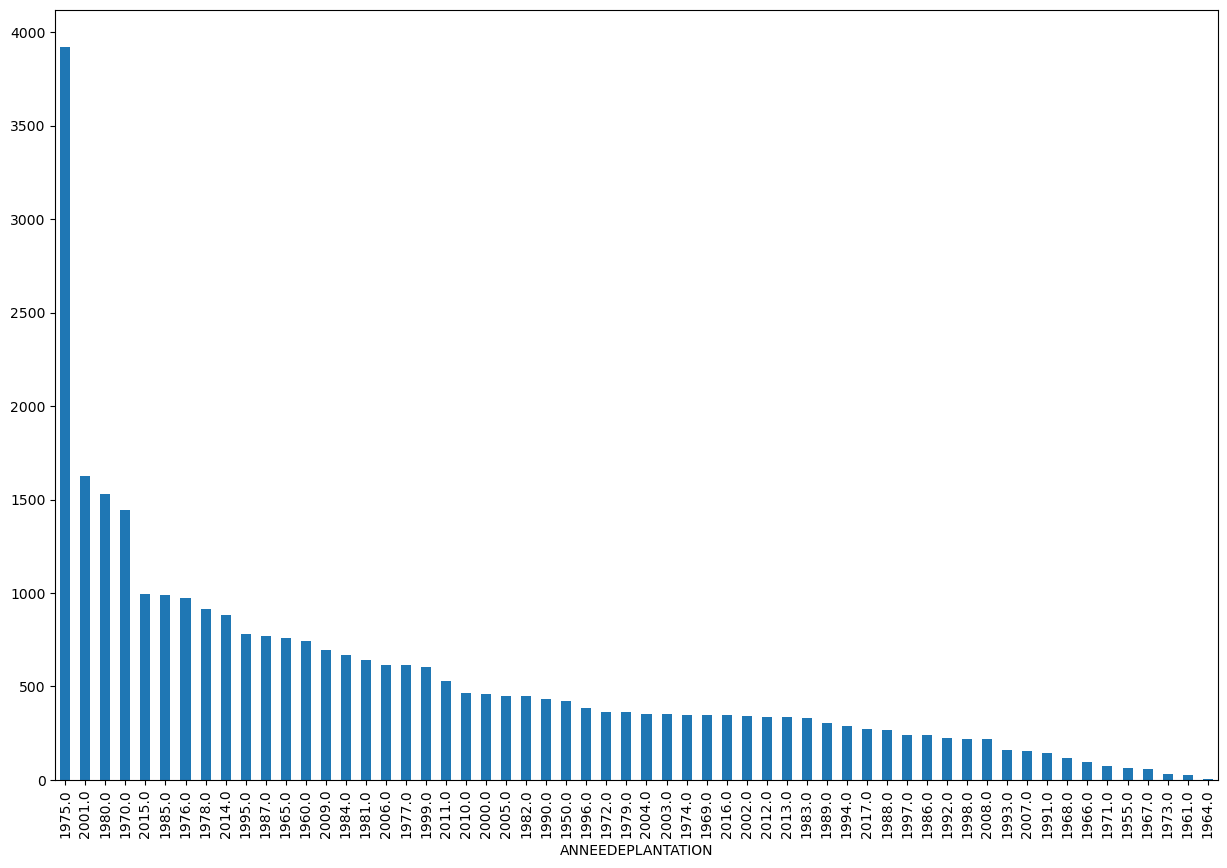

In [93]:
df.ANNEEDEPLANTATION.value_counts().plot(kind='bar', figsize=(15,10))

## Iteration 2 avec pandas

In [94]:
df.GENRE_BOTA.unique()

array([nan, 'Platanus', 'Ginkgo', 'Salix', 'Liriodendron', 'Catalpa',
       'Pyrus', 'Robinia', 'Acer', 'Zelkova', 'Parrotia', 'Fraxinus',
       'Fagus', 'Magnolia', 'Taxus', 'Alnus', 'Picea', 'Cupressus',
       'Sequoiadendron', 'Pinus', 'Betula', 'Tilia', 'Cedrus', 'Populus',
       'Celtis', 'Thuja', 'Sorbus', 'Sophora', 'Liquidambar', 'Prunus',
       'Calocedrus', 'Paulownia', 'Gymnocladus', 'Ulmus', 'Corylus',
       'Morus', 'Clerodendron', 'Gleditsia', 'Libocedrus', 'Quercus',
       'Lagerstroemia', 'Taxodium', 'Amélanchier', 'Cercidiphyllum',
       'Ilex', 'Malus', 'Cedrela', 'Photinia', 'Tetradium',
       'Koelreuteria', 'Halesia', 'Crataegus', 'Aesculus', 'Ptelea',
       'Chimonanthus', 'Carpinus', 'Metasequoia', 'Cercis', 'Cornus',
       'Juglans', 'Pteroceltis', 'Broussonetia', 'Phellodendron',
       'Cupressocyparis', 'Cydonia', 'Ficus', 'Eleagnus', 'Lonicera',
       'Albizia', 'Pterocarya', 'Davidia', 'Buxus', 'Cladastris',
       'Chionanthus', 'Syringa', 'Abi

In [95]:
df.GENRE_BOTA.nunique()

112

In [96]:
df.GENRE_BOTA.value_counts(ascending=True)

GENRE_BOTA
Castanea          1
Sequoia           1
Staphylea         1
Eucalyptus        1
Sciadopitys       1
               ... 
Fraxinus       1506
Tilia          1770
Pinus          2118
Platanus       4663
Acer           5276
Name: count, Length: 112, dtype: int64

In [97]:
df_count_genre_bota = df.GENRE_BOTA.value_counts(ascending=True).to_frame()
df_count_genre_bota

,count
GENRE_BOTA,
Castanea,1
Sequoia,1
Staphylea,1
Eucalyptus,1
Sciadopitys,1
...,...
Fraxinus,1506
Tilia,1770
Pinus,2118


In [98]:
df_count_genre_bota['proportion'] = df_count_genre_bota['count']/df_count_genre_bota['count'].sum()

In [99]:
df_count_genre_bota

,count,proportion
GENRE_BOTA,,
Castanea,1,0.000033
Sequoia,1,0.000033
Staphylea,1,0.000033
Eucalyptus,1,0.000033
Sciadopitys,1,0.000033
...,...,...
Fraxinus,1506,0.049011
Tilia,1770,0.057602
Pinus,2118,0.068927


In [100]:
df_count_genre_bota.loc[df_count_genre_bota['count'] == 1, :]

,count,proportion
GENRE_BOTA,,
Castanea,1,0.000033
Sequoia,1,0.000033
Staphylea,1,0.000033
Eucalyptus,1,0.000033
Sciadopitys,1,0.000033
Sorbopyrus,1,0.000033
Poncinos,1,0.000033
Nyssa,1,0.000033
Rhamnus,1,0.000033


In [101]:
df_count_genre_bota.loc[df_count_genre_bota['count'] == 1, :].sum()

count         10.000000
proportion     0.000325
dtype: float64

In [102]:
df['ESPECE_ENTIER'] = df.GENRE_BOTA + ' ' + df.ESPECE
df.ESPECE_ENTIER.unique()

array([nan, 'Ginkgo biloba', 'Liriodendron tulipifera',
       'Catalpa bignonoides', 'Platanus acerifolia',
       'Robinia pseudoacacia', 'Acer grosseri', 'Zelkova serrata',
       'Parrotia persica', 'Fraxinus excelsior', 'Fagus sylvatica',
       'Acer negundo', 'Magnolia grandiflora', 'Taxus baccata',
       'Alnus cordata', 'Picea abies', 'Cupressus arizonica',
       'Sequoiadendron giganteum', 'Pyrus calleryana', 'Pinus nigra',
       'Betula verrucosa', 'Tilia platyphyllos', 'Acer pseudoplatanus',
       'Tilia tomentosa', 'Acer platanoides', 'Cedrus deodara',
       'Pinus sylvestris', 'Populus alba', 'Celtis australis',
       'Tilia cordata', 'Populus nigra', 'Sorbus aria',
       'Sophora japonica', 'Acer cappadocicum', 'Acer campestre',
       'Acer saccharinum', 'Liquidambar styraciflua', 'Prunus spinosa',
       'Cedrus atlantica', 'Calocedrus decurrens', 'Pinus wallichiana',
       'Prunus cerasus', 'Paulownia tomentosa', 'Sorbus aucuparia',
       'Gymnocladus dioicus

In [103]:
df.ESPECE_ENTIER.nunique()

312

In [104]:
df.ESPECE_ENTIER.value_counts(ascending=True)

ESPECE_ENTIER
Cedrus sinensis              1
Liquidambar tulipifera       1
Halesia monticola            1
Eucalyptus gunii             1
Nyssa sylvatica              1
                          ... 
Acer platanoides          1130
Carpinus betulus          1282
Pinus nigra               1304
Acer pseudoplatanus       1347
Platanus acerifolia       4422
Name: count, Length: 312, dtype: int64

In [105]:
df_count_espece = df.ESPECE_ENTIER.value_counts(ascending=True).to_frame()
df_count_espece

,count
ESPECE_ENTIER,
Cedrus sinensis,1
Liquidambar tulipifera,1
Halesia monticola,1
Eucalyptus gunii,1
Nyssa sylvatica,1
...,...
Acer platanoides,1130
Carpinus betulus,1282
Pinus nigra,1304


In [106]:
df_count_espece['proportion'] = df_count_espece['count']/df_count_espece['count'].sum()
df_count_espece

,count,proportion
ESPECE_ENTIER,,
Cedrus sinensis,1,0.000034
Liquidambar tulipifera,1,0.000034
Halesia monticola,1,0.000034
Eucalyptus gunii,1,0.000034
Nyssa sylvatica,1,0.000034
...,...,...
Acer platanoides,1130,0.038894
Carpinus betulus,1282,0.044126
Pinus nigra,1304,0.044883


In [107]:
df_count_espece.loc[df_count_espece['count'] == 1, :]

,count,proportion
ESPECE_ENTIER,,
Cedrus sinensis,1,0.000034
Liquidambar tulipifera,1,0.000034
Halesia monticola,1,0.000034
Eucalyptus gunii,1,0.000034
Nyssa sylvatica,1,0.000034
Acer hippocastanum,1,0.000034
Quercus hispanica,1,0.000034
Malus coronaria,1,0.000034
Acer utilis,1,0.000034


In [108]:
df_count_espece.loc[df_count_espece['count'] == 1, :].sum()

count         51.000000
proportion     0.001755
dtype: float64

Evolution de la pratique de diversification

In [109]:
df.head()

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON,ESPECE_ENTIER
0,37993,ESP37969,ESP37969,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7603469008942...",NaN
1,37992,ESP37968,ESP37968,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7598264646441...",NaN
2,37991,ESP37967,ESP37967,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7599807314486...",NaN
3,37990,ESP37966,ESP37966,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7600570301267...",NaN
4,37989,ESP37965,ESP37965,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7600202792924...",NaN


In [110]:
evol = df[['ANNEEDEPLANTATION','GENRE_BOTA','ESPECE']]
print(evol.shape)
evol.head()

(31243, 3)


,ANNEEDEPLANTATION,GENRE_BOTA,ESPECE
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [111]:
temp = evol[df['ANNEEDEPLANTATION']==2001]
evol_count_genre = temp.GENRE_BOTA.value_counts().to_frame()
evol_count_genre['proportion'] = evol_count_genre['count']/evol_count_genre['count'].sum()
evol_count_genre.head()

,count,proportion
GENRE_BOTA,,
Betula,216,0.132841
Platanus,196,0.120541
Acer,189,0.116236
Liquidambar,186,0.114391
Fraxinus,146,0.089791


In [112]:
evol_count_genre.shape

(29, 2)

In [113]:
l_ann = list()
l_nb_genre = list()
for annee in range(1950,2018):
    temp = evol[df['ANNEEDEPLANTATION']==annee]
    temp_count_genre = temp.GENRE_BOTA.value_counts().to_frame()
    temp_count_genre['proportion'] = evol_count_genre['count']/evol_count_genre['count'].sum()
    l_ann.append(annee)
    l_nb_genre.append(temp_count_genre.shape[0])

d_nb_genre_ann = {'annee': l_ann, 'nb_genre' : l_nb_genre}
df_nb_genre_ann = pd.DataFrame(data=d_nb_genre_ann)
df_nb_genre_ann.head()

,annee,nb_genre
0,1950,6
1,1951,29
2,1952,29
3,1953,29
4,1954,29


<Axes: xlabel='annee'>

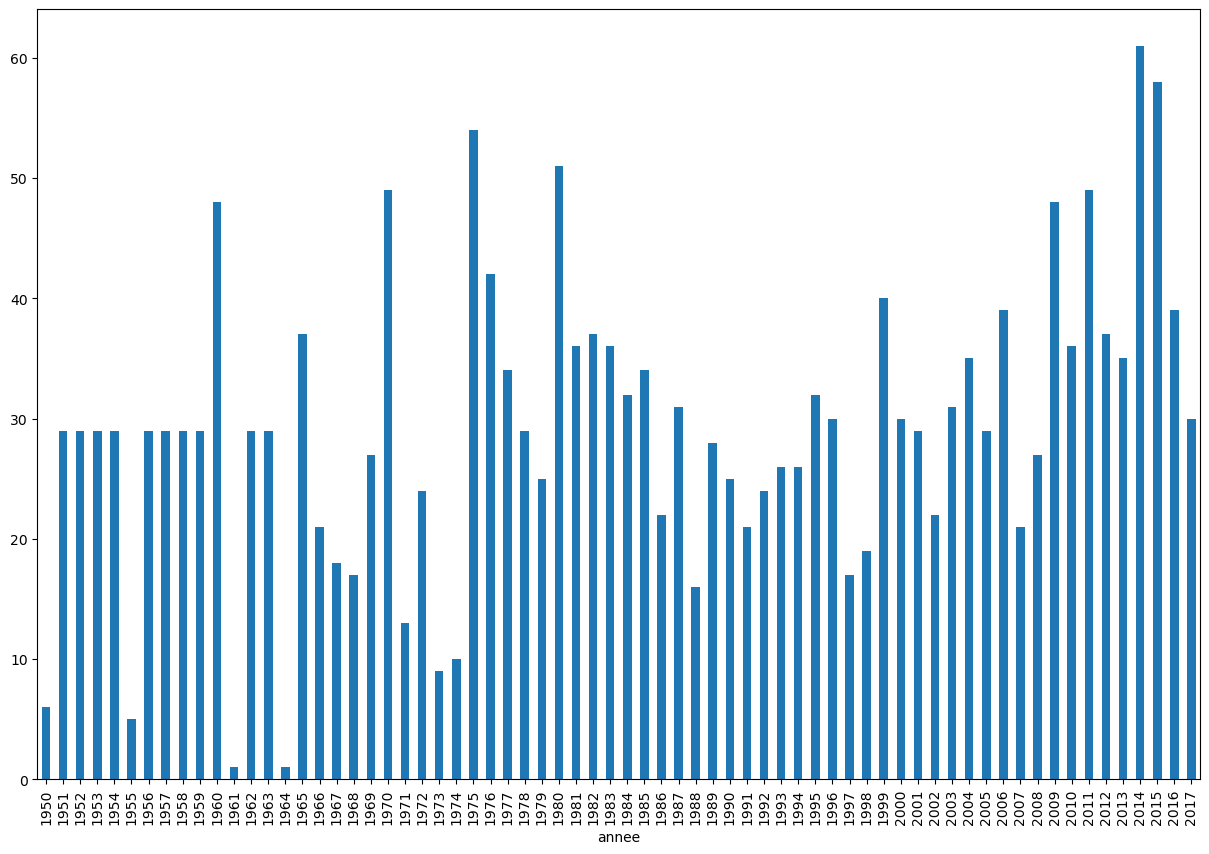

In [114]:
df_nb_genre_ann.set_index('annee').nb_genre.plot(kind='bar', figsize=(15,10))

Depuis les années 90, le nb de genre botanique différent tend à augmenter.

In [115]:
df['today'] = 2025
df.head()

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON,ESPECE_ENTIER,today
0,37993,ESP37969,ESP37969,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7603469008942...",NaN,2025
1,37992,ESP37968,ESP37968,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7598264646441...",NaN,2025
2,37991,ESP37967,ESP37967,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7599807314486...",NaN,2025
3,37990,ESP37966,ESP37966,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7600570301267...",NaN,2025
4,37989,ESP37965,ESP37965,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7600202792924...",NaN,2025


In [116]:
df['esp_vie'] = df['today'] - df['ANNEEDEPLANTATION']
df.head()

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON,ESPECE_ENTIER,today,esp_vie
0,37993,ESP37969,ESP37969,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7603469008942...",NaN,2025,NaN
1,37992,ESP37968,ESP37968,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7598264646441...",NaN,2025,NaN
2,37991,ESP37967,ESP37967,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7599807314486...",NaN,2025,NaN
3,37990,ESP37966,ESP37966,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7600570301267...",NaN,2025,NaN
4,37989,ESP37965,ESP37965,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7600202792924...",NaN,2025,NaN


Age moyen, min et max

In [117]:
df['esp_vie'].mean(), df['esp_vie'].min(), df['esp_vie'].max()

(np.float64(37.1302555111847), 8.0, 75.0)

In [118]:
df_count_espece

,count,proportion
ESPECE_ENTIER,,
Cedrus sinensis,1,0.000034
Liquidambar tulipifera,1,0.000034
Halesia monticola,1,0.000034
Eucalyptus gunii,1,0.000034
Nyssa sylvatica,1,0.000034
...,...,...
Acer platanoides,1130,0.038894
Carpinus betulus,1282,0.044126
Pinus nigra,1304,0.044883


In [119]:
df_count_espece = df_count_espece.reset_index()
df_count_espece.columns

Index(['ESPECE_ENTIER', 'count', 'proportion'], dtype='object')

In [120]:
especes_non_desirees = ['Acer platanoides','Acer saccharinum', 'Albizza julibrissin', 'Catalpa bignonioides', 'Ginko biloba', 'Gleditsia triacanthos', 'Koelreuteria paniculata', 'Laburnum anagyroides', 'Paulownia tomentosa', 'Prunus pissardi', 'Sophora japonica']

Proportion d'especes non d'esirees (tableau 1 uniquement de l annexe A)

In [121]:
sum_non_d = 0
for i in range(len(df_count_espece)):
    if df_count_espece.at[i, 'ESPECE_ENTIER'] in especes_non_desirees:
        sum_non_d += df_count_espece.at[i, 'proportion']
print(sum_non_d)

0.09492995559838915


# Iteration 4

**24/04/2025 et 28/04**

In [122]:
import folium

In [123]:
gre = folium.Map(location=(45.166672, 5.71667), control_scale=True, tiles="cartodb positron", zoom_start=12.5)

group_copain = folium.FeatureGroup("group copain").add_to(gre)
folium.Marker(
    location=[45.1817746, 5.7456670],
    tooltip="Click me!",
    popup="Chez Quentin",
    icon=folium.Icon(icon="star", color="red"),
).add_to(group_copain)
folium.Marker(
    location=[45.1907140, 5.7259476],
    tooltip="Click me!",
    popup="Chez Starcat",
    icon=folium.Icon(icon="star", color="blue"),
).add_to(group_copain)




In [124]:
group_arbres = folium.FeatureGroup("group arbres").add_to(gre)
for i in range(df.shape[0]):
    folium.Marker(
        location=[eval(df.at[i,'GeoJSON'])['coordinates'][1], eval(df.at[i,'GeoJSON'])['coordinates'][0]],
        tooltip="Click to get info!",
        popup="Year: " + str(df.at[i, 'ANNEEDEPLANTATION']),
        icon=folium.Icon(icon="glyphicon-tree-conifer", color="green"),).add_to(group_arbres)

In [125]:
geo_df_list = list()
for i in range(df.shape[0]):
    geo_df_list.append([eval(df.at[i,'GeoJSON'])['coordinates'][1],eval(df.at[i,'GeoJSON'])['coordinates'][0]])

In [126]:
geo_df_list[1]

[45.154046459904, 5.75982646464411]

In [127]:
gre_heat = folium.Map(location=(45.166672, 5.71667), control_scale=True, tiles="cartodb positron", zoom_start=12.5)

In [128]:
from folium import plugins
plugins.HeatMap(geo_df_list).add_to(gre_heat)
gre_heat

In [129]:
from geopy.distance import geodesic, great_circle

arbre1 = tuple(geo_df_list[1])
arbre2 = tuple(geo_df_list[2])

print(arbre1, arbre2)
print("geodesic distance", geodesic(arbre1,arbre2).km)
print("great-circle distance", great_circle(arbre1,arbre2).km)

(45.154046459904, 5.75982646464411) (45.1540202490699, 5.75998073144869)
geodesic distance 0.012475650742302275
great-circle distance 0.012442999496730575


In [130]:
import math
def haversine(arbre1, arbre2):
    lat1 = arbre1[0]
    lon1 = arbre1[1]
    lat2 = arbre2[0]
    lon2 = arbre2[1]
    
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0
 
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0
 
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
             math.cos(lat1) * math.cos(lat2));
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c
haversine(arbre1, arbre2)

0.012442981918934956

In [131]:
chez_quentin = (45.1817746, 5.7456670)

l_dist = list()

for arbre in geo_df_list:
    arbre = tuple(arbre)
    l_dist.append(geodesic(chez_quentin, arbre))

print(len(l_dist))



31243


In [132]:
d_dist_quentin = {'arbre': geo_df_list, 'distAquentin' : l_dist}
df_dist_quentin = pd.DataFrame(data=d_dist_quentin)
df_dist_quentin.head()

,arbre,distAquentin
0,"[45.1543159441061, 5.76034690089422]",3.262555871789441 km
1,"[45.154046459904, 5.75982646464411]",3.2764610217103116 km
2,"[45.1540202490699, 5.75998073144869]",3.283337691632623 km
3,"[45.1538601663191, 5.76005703012677]",3.3021073156667238 km
4,"[45.1539221005346, 5.76002027929244]",3.2946507883395943 km


In [133]:
df_dist_quentin.distAquentin[0]

Distance(3.262555871789441)

In [134]:
df_10_proches = df_dist_quentin.sort_values(by=["distAquentin"], ascending=True)[:10]

In [135]:
df_10_proches.reset_index(drop=True, inplace=False)

,arbre,distAquentin
0,"[45.1819041983629, 5.74547816924242]",0.020681306509403967 km
1,"[45.1818620234698, 5.74535737987717]",0.02620307423013737 km
2,"[45.1818257445625, 5.74522992099952]",0.034820190641539205 km
3,"[45.1818509862283, 5.74478556830316]",0.06979614380759974 km
4,"[45.1818441178697, 5.74478238687682]",0.06995594004869989 km
5,"[45.1818532623575, 5.74477857106847]",0.07037302954406173 km
6,"[45.1819416038666, 5.74473827395026]",0.07531771759757898 km
7,"[45.1819826318104, 5.74471827875391]",0.07806857387684563 km
8,"[45.181173710852, 5.74500674564375]",0.08457301807802205 km
9,"[45.1818956958589, 5.74456268368393]",0.08783316124992804 km


In [136]:
df_10_proches

,arbre,distAquentin
8262,"[45.1819041983629, 5.74547816924242]",0.020681306509403967 km
8264,"[45.1818620234698, 5.74535737987717]",0.02620307423013737 km
8263,"[45.1818257445625, 5.74522992099952]",0.034820190641539205 km
21539,"[45.1818509862283, 5.74478556830316]",0.06979614380759974 km
21537,"[45.1818441178697, 5.74478238687682]",0.06995594004869989 km
21533,"[45.1818532623575, 5.74477857106847]",0.07037302954406173 km
21540,"[45.1819416038666, 5.74473827395026]",0.07531771759757898 km
21541,"[45.1819826318104, 5.74471827875391]",0.07806857387684563 km
14521,"[45.181173710852, 5.74500674564375]",0.08457301807802205 km
28988,"[45.1818956958589, 5.74456268368393]",0.08783316124992804 km


In [137]:
df_10_proches.reset_index(drop=True, inplace=False).at[5, 'arbre']

[45.1818532623575, 5.74477857106847]

In [138]:
gre_10 = folium.Map(location=(45.166672, 5.71667), control_scale=True, tiles="cartodb positron", zoom_start=12.5)

group_copain = folium.FeatureGroup("group copain").add_to(gre_10)
folium.Marker(
    location=[45.1817746, 5.7456670],
    tooltip="Click me!",
    popup="Chez Quentin",
    icon=folium.Icon(icon="star", color="red"),
).add_to(group_copain)
folium.Marker(
    location=[45.1907140, 5.7259476],
    tooltip="Click me!",
    popup="Chez Starcat",
    icon=folium.Icon(icon="star", color="blue"),
).add_to(group_copain)

group_10arbres = folium.FeatureGroup("group arbres").add_to(gre_10)
for i in range(df_10_proches.shape[0]):
    folium.Marker(
        location=df_10_proches.reset_index(drop=True, inplace=False).at[i, 'arbre'],
        tooltip="Click to get info!",
        popup="Year: " + str(df.at[i, 'ANNEEDEPLANTATION']),
        icon=folium.Icon(icon="glyphicon-tree-conifer", color="green"),).add_to(group_10arbres)

In [139]:
gre_10

In [140]:
df_10_proches.arbre

8262     [45.1819041983629, 5.74547816924242]
8264     [45.1818620234698, 5.74535737987717]
8263     [45.1818257445625, 5.74522992099952]
21539    [45.1818509862283, 5.74478556830316]
21537    [45.1818441178697, 5.74478238687682]
21533    [45.1818532623575, 5.74477857106847]
21540    [45.1819416038666, 5.74473827395026]
21541    [45.1819826318104, 5.74471827875391]
14521     [45.181173710852, 5.74500674564375]
28988    [45.1818956958589, 5.74456268368393]
Name: arbre, dtype: object

In [141]:
d_arbre = {'arbre': geo_df_list}

In [142]:
df_arbre = pd.DataFrame(data=d_arbre)
df_arbre.head()

,arbre
0,"[45.1543159441061, 5.76034690089422]"
1,"[45.154046459904, 5.75982646464411]"
2,"[45.1540202490699, 5.75998073144869]"
3,"[45.1538601663191, 5.76005703012677]"
4,"[45.1539221005346, 5.76002027929244]"


In [143]:
print(df_arbre.iat[0,0])
print(df_arbre.iat[0,0][0])
print(df_arbre.iat[0,0][1])

[45.1543159441061, 5.76034690089422]
45.1543159441061
5.76034690089422


In [144]:
d_dist = dict()

for i in range(100,150):
    l_arbre_temp = list()
    for j in range(100,150):
        l_arbre_temp.append(geodesic(df_arbre.iat[i,0],df_arbre.iat[j,0]))
    d_dist[f'{i}'] = l_arbre_temp

print(d_dist)

{'100': [Distance(0.0), Distance(0.04048123180550807), Distance(0.03547075283070986), Distance(0.04349435685475001), Distance(0.03823381521155012), Distance(0.0982643436036901), Distance(0.003636276960988057), Distance(0.022017376963693457), Distance(0.06655380074361954), Distance(0.06912312628330529), Distance(0.02405697348639845), Distance(0.05284255091080562), Distance(0.08886978447076344), Distance(0.05339308309526798), Distance(0.04398046946382391), Distance(0.07051975351355763), Distance(0.07078786962511627), Distance(0.06183856687849366), Distance(0.03308330619872207), Distance(0.04908634682156022), Distance(0.05588845201757712), Distance(0.0511667754023281), Distance(0.03126172996864532), Distance(0.06228015661610294), Distance(0.003942752524319419), Distance(0.05029592431182536), Distance(0.07368861007742368), Distance(0.0370054287060664), Distance(0.04522015891432817), Distance(0.0514957976078632), Distance(0.0724261774684893), Distance(2.843070500525466), Distance(2.77577341

In [145]:
df_dist = pd.DataFrame(data=d_dist)

In [146]:
df_dist

,100,101,102,103,104,105,106,107,108,109,...,140,141,142,143,144,145,146,147,148,149
0,0.0 km,0.04048123180550807 km,0.03547075283070986 km,0.04349435685475001 km,0.03823381521155012 km,0.0982643436036901 km,0.003636276960988057 km,0.022017376963693457 km,0.06655380074361954 km,0.06912312628330529 km,...,2.773137763348603 km,2.859520190349587 km,2.9026406065773322 km,2.9100155134051895 km,2.869448190713844 km,2.91562402594294 km,2.870202187446124 km,2.9104289083503216 km,2.7732876185966555 km,2.9203057713925795 km
1,0.04048123180550807 km,0.0 km,0.05926612588809457 km,0.06488605213395222 km,0.07791423824191525 km,0.05903075884430745 km,0.0372964109774953 km,0.026585157144219093 km,0.0864314841259175 km,0.08708589827934045 km,...,2.7926659508161085 km,2.876462206903335 km,2.919486241213432 km,2.926764546751275 km,2.88551107342248 km,2.932126861929737 km,2.886213674219687 km,2.926812797154006 km,2.793407769286338 km,2.936961675424435 km
2,0.03547075283070986 km,0.05926612588809457 km,0.0 km,0.008069098102603242 km,0.05393218474848943 km,0.10527858585767826 km,0.03790897287066722 km,0.03291016622853753 km,0.03116767563669694 km,0.03365364883486849 km,...,2.8000632130959513 km,2.8880190731100845 km,2.9311914745644874 km,2.9386208525614483 km,2.8984395136117156 km,2.94436795517175 km,2.8992216262826047 km,2.9392397438128204 km,2.7998224798882467 km,2.948963158326989 km
3,0.04349435685475001 km,0.06488605213395222 km,0.008069098102603242 km,0.0 km,0.06047448319494553 km,0.10756077822673928 km,0.045856583318478916 km,0.03911239041936868 km,0.02335649059600018 km,0.02564353279420444 km,...,2.8067848623436005 km,2.895038793146894 km,2.938220671266946 km,2.9456601935968765 km,2.9055509392940992 km,2.951433133596624 km,2.9063382588967244 km,2.946317413726169 km,2.8064688613703552 km,2.9560121647501365 km
4,0.03823381521155012 km,0.07791423824191525 km,0.05393218474848943 km,0.06047448319494553 km,0.0 km,0.13637674499226934 km,0.040929469229090874 km,0.059315845254987905 km,0.07749256791069042 km,0.08147830868129118 km,...,2.7463103828651048 km,2.834716085464808 km,2.8779083573480606 km,2.885359526032033 km,2.8453469329987633 km,2.89116425170735 km,2.8461421918649865 km,2.8860650233388863 km,2.7460032868006037 km,2.895723012934224 km
5,0.0982643436036901 km,0.05903075884430745 km,0.10527858585767826 km,0.10756077822673928 km,0.13637674499226934 km,0.0 km,0.09544830648122232 km,0.07914736988460246 km,0.1225583207156321 km,0.121177083315939 km,...,2.836604066228623 km,2.9174836338168237 km,2.960388854382818 km,2.9675550502647012 km,2.9255196635269054 km,2.9726335519019895 km,2.926162640210508 km,2.9671835924842784 km,2.8379933589250363 km,2.977643331324077 km
6,0.003636276960988057 km,0.0372964109774953 km,0.03790897287066722 km,0.045856583318478916 km,0.040929469229090874 km,0.09544830648122232 km,0.0 km,0.020741307827716375 km,0.06907021271586584 km,0.07149710743396591 km,...,2.7731965899994186 km,2.8593186153029437 km,2.9024298032785736 km,2.909795214187725 km,2.8691601484688025 km,2.9153794905798294 km,2.8699091243814436 km,2.910172637538308 km,2.7734076336400215 km,2.9200763522245734 km
7,0.022017376963693457 km,0.026585157144219093 km,0.03291016622853753 km,0.03911239041936868 km,0.059315845254987905 km,0.07914736988460246 km,0.020741307827716375 km,0.0 km,0.06166771469068364 km,0.06293311379281089 km,...,2.7932417204083655 km,2.8789322373405675 km,2.922026089632013 km,2.9293736829265598 km,2.888607964822898 km,2.934911921288123 km,2.8893469645982917 km,2.9296824915386135 km,2.79353931018352 km,2.9396375665622005 km
8,0.06655380074361954 km,0.0864314841259175 km,0.03116767563669694 km,0.02335649059600018 km,0.07749256791069042 km,0.1225583207156321 km,0.06907021271586584 km,0.06166771469068364 km,0.0 km,0.004427140499625391 km,...,2.821738201770943 km,2.911213485140094 km,2.954434487248016 km,2.961916776451805 km,2.922115931584122 km,2.9677993200589086 km,2.92292564376172 km,2.9627369608263847 km,2.821122532189703 km,2.972309517014168

In [147]:
df_dist.max()

100     2.922250472360054 km
101     2.938970743716319 km
102    2.9508712717675545 km
103    2.9579134327309853 km
104     2.897616060394639 km
105    2.9797258752117415 km
106     2.922027419261553 km
107    2.9416006527321286 km
108     2.974181718676236 km
109    2.9783983799215203 km
110     2.911214837768575 km
111     2.951070793672216 km
112    2.9751100091109812 km
113     2.975609377024262 km
114    2.9408019269404755 km
115     2.989464685863944 km
116    2.9876163656051404 km
117     2.981873462488771 km
118     2.949473333247435 km
119     2.922082485508535 km
120    2.9781294618229674 km
121    2.8863165413475245 km
122     2.947541800862291 km
123    2.9714131626273605 km
124    2.9196193390554552 km
125    2.9116116517453126 km
126    2.9829508871237254 km
127    2.9379829927723953 km
128     2.957267404924818 km
129    2.9709586990085275 km
130     2.967770911424713 km
131    2.9109436850618042 km
132     2.844386911219621 km
133    2.9183388419769787 km
134     2.9012

In [156]:
max(list(df_dist.max()))

Distance(2.989464685863944)

Le plus entoure correspond a celui ayant le plus d'arbre a moins de 20 metres 0.02 km

In [149]:
df_dist.iat[0,0]

Distance(0.0)

In [150]:
for i in range(100,150):
    print(i, sum((df_dist[str(i)]<0.02)))

100 3
101 4
102 4
103 5
104 3
105 2
106 3
107 2
108 2
109 2
110 2
111 4
112 3
113 4
114 4
115 3
116 5
117 5
118 4
119 2
120 4
121 2
122 3
123 4
124 3
125 2
126 3
127 5
128 5
129 5
130 3
131 1
132 2
133 1
134 1
135 4
136 2
137 1
138 1
139 2
140 2
141 1
142 2
143 4
144 2
145 4
146 2
147 2
148 1
149 4


In [154]:
for i in range(100,150):
    if df_dist[str(i)].min() == 0:
        print(i, df_dist[df_dist[str(i)] != 0].min())


Tentative arbre pivot

In [210]:
d_dist_pivot = dict()

l_arbre_A = list()
l_arbre_B = list()
distance = list()

g=0
for i in range(100,150):
    g+=1
    for j in range(100+g,150):
        l_arbre_A.append(f'arbre_{i}')
        l_arbre_B.append(f'arbre_{j}')
        distance.append(geodesic(df_arbre.iat[i,0],df_arbre.iat[j,0]))
    d_dist_pivot['arbre_A'] = l_arbre_A
    d_dist_pivot['arbre_B'] = l_arbre_B
    d_dist_pivot['distance_a_b'] = distance

print(d_dist_pivot)

{'arbre_A': ['arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101',

In [211]:
df_dist_pivot = pd.DataFrame(d_dist_pivot)

In [212]:
df_dist_pivot

,arbre_A,arbre_B,distance_a_b
0,arbre_100,arbre_101,0.04048123180550807 km
1,arbre_100,arbre_102,0.03547075283070986 km
2,arbre_100,arbre_103,0.04349435685475001 km
3,arbre_100,arbre_104,0.03823381521155012 km
4,arbre_100,arbre_105,0.0982643436036901 km
...,...,...,...
1220,arbre_146,arbre_148,0.3348558944963007 km
1221,arbre_146,arbre_149,0.07137455091184051 km
1222,arbre_147,arbre_148,0.3243709416155862 km
1223,arbre_147,arbre_149,0.02373428693953452 km


In [213]:
df_pivot = pd.pivot_table(df_dist_pivot, values='distance_a_b', index=['arbre_A', 'arbre_B'], aggfunc='sum')

In [214]:
df_pivot

distance_a_b
arbre_A   arbre_B                          
arbre_100 arbre_101  0.04048123180550807 km
          arbre_102  0.03547075283070986 km
          arbre_103  0.04349435685475001 km
          arbre_104  0.03823381521155012 km
          arbre_105   0.0982643436036901 km
...                                     ...
arbre_146 arbre_148   0.3348558944963007 km
          arbre_149  0.07137455091184051 km
arbre_147 arbre_148   0.3243709416155862 km
          arbre_149  0.02373428693953452 km
arbre_148 arbre_149   0.3104320677040809 km

[1225 rows x 1 columns]

In [215]:
df_pivot.idxmax(), df_pivot.max()

(distance_a_b    (arbre_115, arbre_135)
 dtype: object,
 distance_a_b    2.989464685863944 km
 dtype: object)

In [209]:
df_pivot.index.names

FrozenList(['arbre_A', 'arbre_B'])

In [223]:
df_pivot.loc[("arbre_115", 'arbre_135'), 'distance_a_b']

Distance(2.989464685863944)

Arbre le plus entoure = arbre ayant le plus d'arbre a moins de 20 metres

In [227]:
d_dist_pivot_moche = dict()

l_arbre_A = list()
l_arbre_B = list()
distance = list()

for i in range(100,150):
    for j in range(100,150):
        l_arbre_A.append(f'arbre_{i}')
        l_arbre_B.append(f'arbre_{j}')
        distance.append(geodesic(df_arbre.iat[i,0],df_arbre.iat[j,0]))
    d_dist_pivot_moche['arbre_A'] = l_arbre_A
    d_dist_pivot_moche['arbre_B'] = l_arbre_B
    d_dist_pivot_moche['distance_a_b'] = distance

print(d_dist_pivot_moche)

{'arbre_A': ['arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_100', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101', 'arbre_101',

In [231]:
df_dist_pivot_moche = pd.DataFrame(d_dist_pivot_moche)

df_pivot_moche = pd.pivot_table(df_dist_pivot_moche, values='distance_a_b', index=['arbre_A', 'arbre_B'], aggfunc='sum')

In [232]:
df_pivot_moche

distance_a_b
arbre_A   arbre_B                           
arbre_100 arbre_100                   0.0 km
          arbre_101   0.04048123180550807 km
          arbre_102   0.03547075283070986 km
          arbre_103   0.04349435685475001 km
          arbre_104   0.03823381521155012 km
...                                      ...
arbre_149 arbre_145  0.013028630402839187 km
          arbre_146   0.07137455091184051 km
          arbre_147   0.02373428693953452 km
          arbre_148    0.3104320677040809 km
          arbre_149                   0.0 km

[2500 rows x 1 columns]

In [236]:
dd = dict()
for i in range(100,150):
    dd[i] = sum(df_pivot_moche.loc[f"arbre_{i}", 'distance_a_b']<=0.02)
print(dd)

{100: 3, 101: 4, 102: 4, 103: 5, 104: 3, 105: 2, 106: 3, 107: 2, 108: 2, 109: 2, 110: 2, 111: 4, 112: 3, 113: 4, 114: 4, 115: 3, 116: 5, 117: 5, 118: 4, 119: 2, 120: 4, 121: 2, 122: 3, 123: 4, 124: 3, 125: 2, 126: 3, 127: 5, 128: 5, 129: 5, 130: 3, 131: 1, 132: 2, 133: 1, 134: 1, 135: 4, 136: 2, 137: 1, 138: 1, 139: 2, 140: 2, 141: 1, 142: 2, 143: 4, 144: 2, 145: 4, 146: 2, 147: 2, 148: 1, 149: 4}


Several trees can be considered the most surrounded, one of them and the first one in the list is the 103

In [238]:
max(dd, key=dd.get)

103